# KNN Ruzhytskyi Dmytro

## Імпорт бібліотек

In [71]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

## Генеруємо вхідні ознаки та відповіді у межах [0, 1]

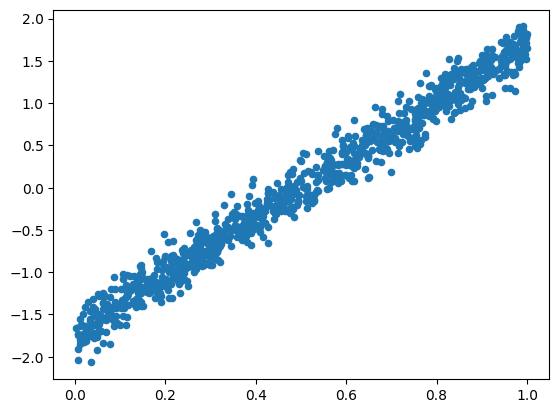

In [73]:
# Генерація випадкових даних
n = 1000
x = np.random.rand(n)
y = 13 * x + 18 + np.random.randn(n) * 0.6

# Створення об'єкта StandardScaler
normalization = StandardScaler()

# Змінення розмірності змінної y для використання StandardScaler
y_reshaped = y.reshape(-1, 1)

# Нормалізація цільової змінної y
y_normalized = normalization.fit_transform(y_reshaped).flatten()

# Створення DataFrame
df = pd.DataFrame({'x': x, 'y': y_normalized})

# Отримання значень змінної x у вигляді масиву
x = df[['x']].values

# Побудова графіку
plt.scatter(x, y_normalized, s=20)
plt.show()


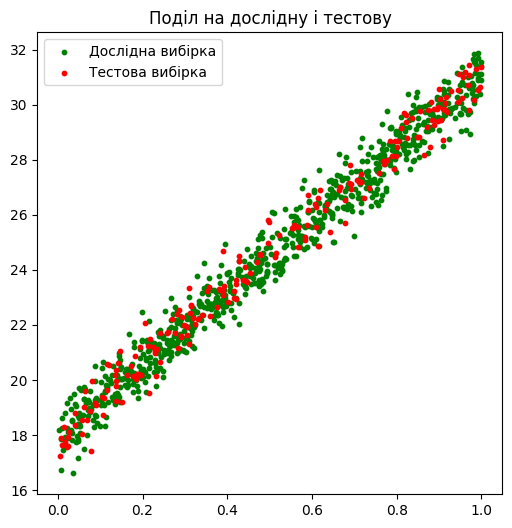

In [74]:
plt.figure(figsize=(6, 6))

# рандомне розділення 80/20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# графік для 2-ох вибірок
plt.scatter(X_train, y_train, s = 10, color='green', label='Дослідна вибірка')
plt.scatter(X_test, y_test, s = 10, color='red', label='Тестова вибірка')
plt.legend()
plt.title('Поділ на дослідну і тестову')
plt.show()
     


## Метод для обрахунку KNN-регресії та побудова графіку

In [75]:
def knn_regression(k, X, y, name):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Обрахунок похибок
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    
    sorted_indices = X.squeeze().argsort()
    X_sorted = X[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    # Побудова графіку
    plt.figure(figsize=(5, 5))
    plt.plot(X_sorted, y_pred_sorted, linewidth=0.9, color='red', label='Регресія')
    plt.scatter(X, y, s=10, label=f'{name} вибірка')
    plt.legend()
    plt.title(f"Лінія регресії при k = {k}\n{name} вибірка")
    plt.grid(True)
    plt.show()

    # Вивід метрик та параметрів
    print(f"\t{name} вибірка")
    print(f"Коефіцієнт детермінації: {r_squared}")
    print(f"Середньоквадратична похибка: {mse}")

    return [mse, r_squared, k]


### Дослідницька вибірка

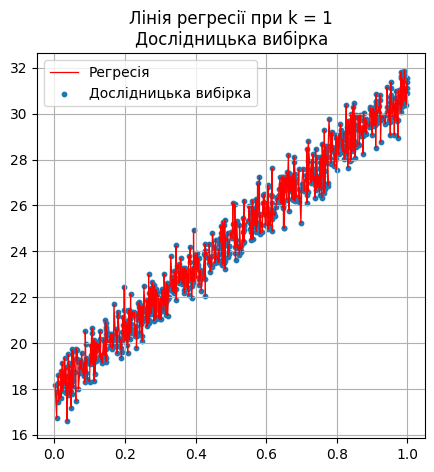

	Дослідницька вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


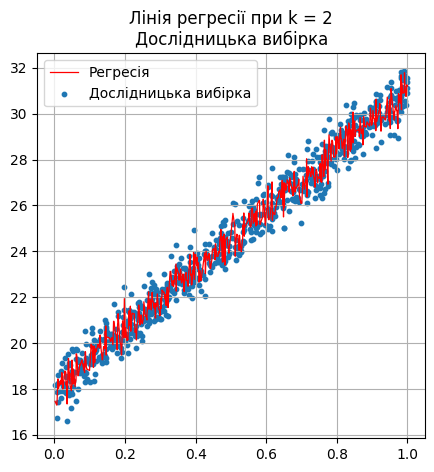

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9870275809646062
Середньоквадратична похибка: 0.1861649521780294


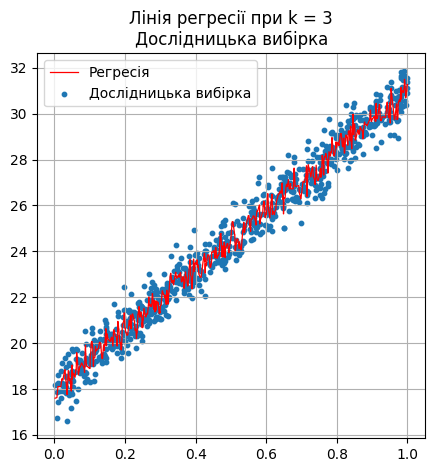

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9828318434954816
Середньоквадратична похибка: 0.24637725823752477


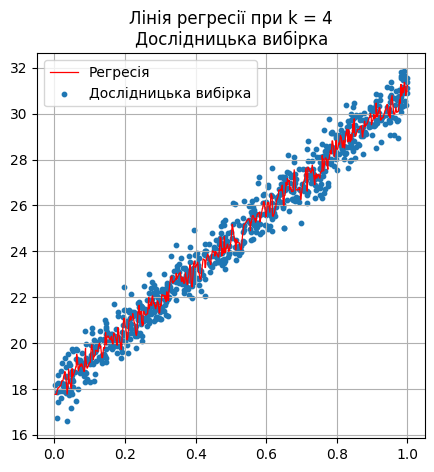

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9808372157720517
Середньоквадратична похибка: 0.27500181729101714


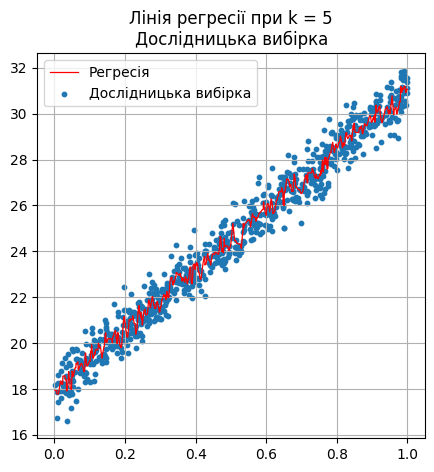

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9795774851300492
Середньоквадратична похибка: 0.29307999485263897


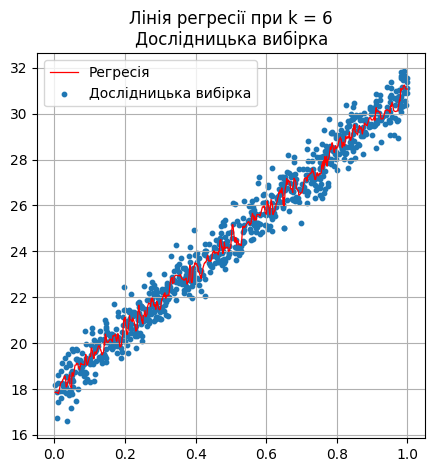

	Дослідницька вибірка
Коефіцієнт детермінації: 0.9784015807165316
Середньоквадратична похибка: 0.30995519664123017


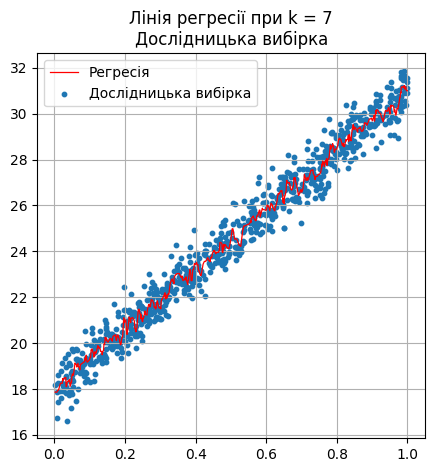

	Дослідницька вибірка
Коефіцієнт детермінації: 0.977780682051709
Середньоквадратична похибка: 0.3188656064829663


In [76]:
error_results_train = [
    knn_regression(k, X_train, y_train, "Дослідницька") for k in range(1, 8)
]

In [77]:
error_results_df_train = pd.DataFrame(error_results_train, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Дослідницька вибірка:")
display(error_results_df_train)

Дослідницька вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.186165,0.987028,2
2,0.246377,0.982832,3
3,0.275002,0.980837,4
4,0.293080,0.979577,5
5,0.309955,0.978402,6
6,0.318866,0.977781,7


### Тестова вибірка

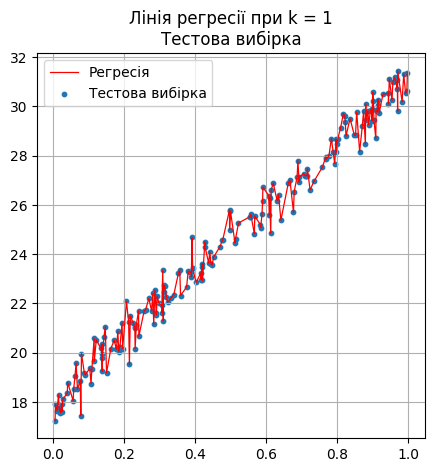

	Тестова вибірка
Коефіцієнт детермінації: 1.0
Середньоквадратична похибка: 0.0


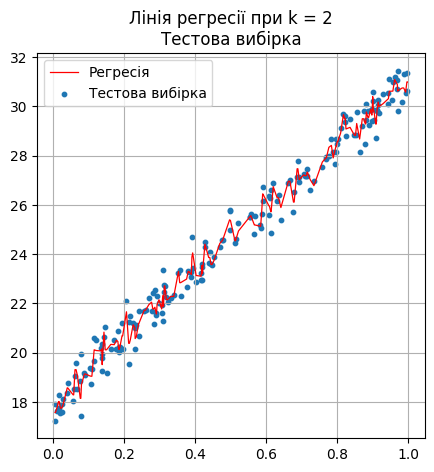

	Тестова вибірка
Коефіцієнт детермінації: 0.9910743959075183
Середньоквадратична похибка: 0.1447870554013575


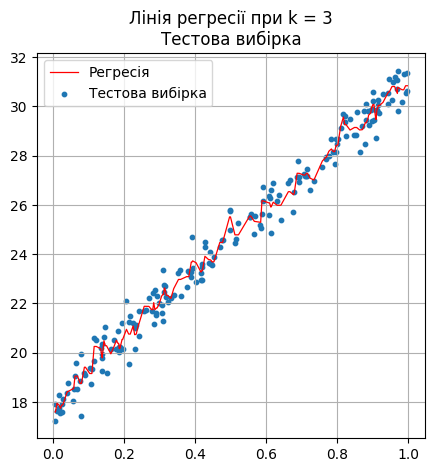

	Тестова вибірка
Коефіцієнт детермінації: 0.9873984032763277
Середньоквадратична похибка: 0.20441732168165497


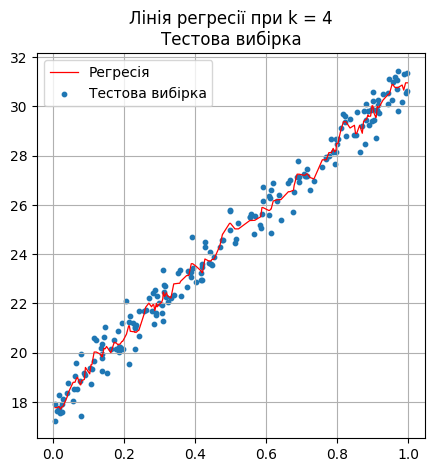

	Тестова вибірка
Коефіцієнт детермінації: 0.9855373514632023
Середньоквадратична похибка: 0.23460645052714774


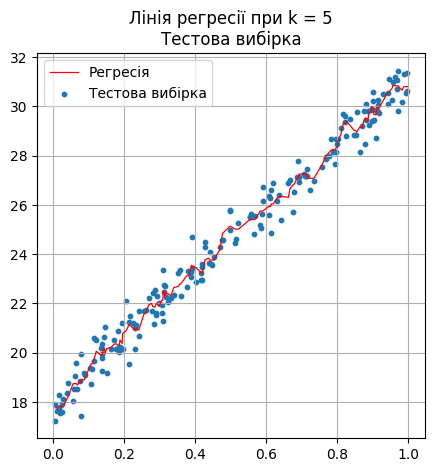

	Тестова вибірка
Коефіцієнт детермінації: 0.9850671126880762
Середньоквадратична похибка: 0.2422344482380683


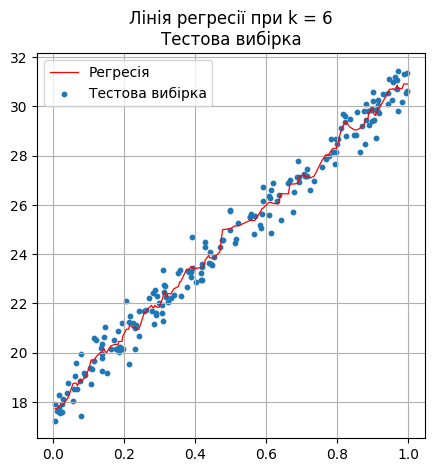

	Тестова вибірка
Коефіцієнт детермінації: 0.9845411555139199
Середньоквадратична похибка: 0.25076628425995456


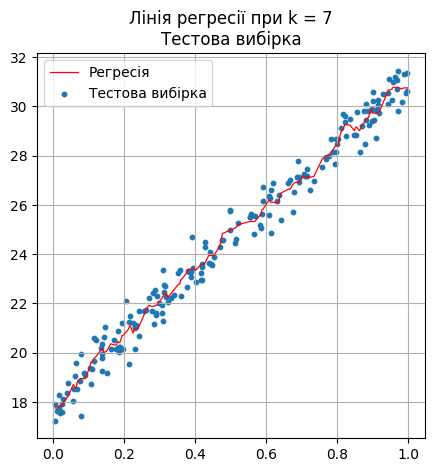

	Тестова вибірка
Коефіцієнт детермінації: 0.9842793861959909
Середньоквадратична похибка: 0.25501258606145194


In [78]:
error_results_test = [
    knn_regression(k, X_test, y_test, "Тестова") for k in range(1, 8)
]

In [79]:
error_results_df_test = pd.DataFrame(error_results_test, columns=['Середн.квадр. похибка', 'Коеф. детермінації', 'К-сть сусідів'])
print("Тестова вибірка:")
display(error_results_df_test)

Тестова вибірка:


,Середн.квадр. похибка,Коеф. детермінації,К-сть сусідів
0,0.000000,1.000000,1
1,0.144787,0.991074,2
2,0.204417,0.987398,3
3,0.234606,0.985537,4
4,0.242234,0.985067,5
5,0.250766,0.984541,6
6,0.255013,0.984279,7
